In [1]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns 

# Files to Load 
city_data_to_load = "city_data.csv"
ride_data_to_load = "ride_data.csv"

city_data = pd.read_csv(city_data_to_load).dropna()
ride_data = pd.read_csv(ride_data_to_load).dropna()

In [2]:
# Drop duplicate values
city_data = city_data.drop_duplicates('city')
# Check city data
city_data.head()

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban


In [3]:
# Check ride data
ride_data.head()

,city,date,fare,ride_id
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344


In [4]:
# combine both data sets
pyber_data_df = ride_data.merge(city_data, on = 'city', how = 'left')
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344,46,Urban


# Bubble Plot of Ride Sharing Data

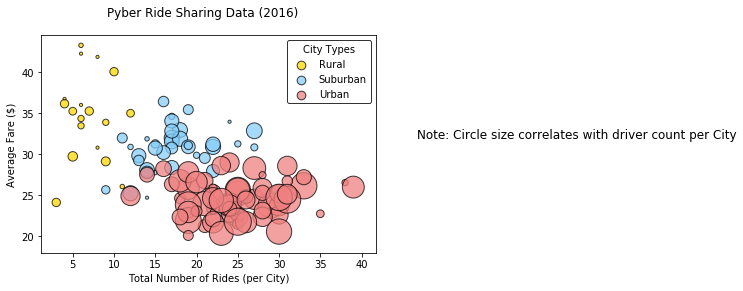

In [5]:
# Define colors
color_scheme = {'Gold':'#FFD700', 'Light Sky Blue':'#87CEFA', 'Light Coral':'#F08080'}
#group be city name
by_city = pyber_data_df.groupby('city')

# calculate average fare by city
avg_fare = by_city.mean()['fare']

#calculate total rides by city
ride_count = by_city['ride_id'].count()

# calculate average drivers count by city 
driver_count = by_city.mean()['driver_count']

# city type data
city_type = city_data.set_index('city')['type']

# create dataframe from above series
city_info = pd.DataFrame({
    "Number of Rides": ride_count,
    "Average Fare": avg_fare,
    "Number of Drivers": driver_count,
    "Type of City": city_type
})

city_info.sort_values('Number of Drivers', ascending = False)

#create separate dataframe per city type
rural = city_info[city_info['Type of City'] == 'Rural']
suburban = city_info[city_info['Type of City'] == 'Suburban']
urban = city_info[city_info['Type of City'] == 'Urban']

#create color Dictionary from the color_scheme 
city_color = {'Urban': color_scheme['Light Coral'], 'Suburban': color_scheme['Light Sky Blue'], 'Rural': color_scheme['Gold']}

plt.suptitle('Pyber Ride Sharing Data (2016)')

# three scatter plots for each city type
plt.scatter(rural['Number of Rides'], rural['Average Fare'], s = rural['Number of Drivers']*10, color = city_color['Rural'], edgecolor = 'black', label = 'Rural', alpha = .75)
plt.scatter(suburban['Number of Rides'], suburban['Average Fare'], s = suburban['Number of Drivers']*10, color = city_color['Suburban'], edgecolor = 'black', label = 'Suburban', alpha = .75)
plt.scatter(urban['Number of Rides'], urban['Average Fare'], s = urban['Number of Drivers']*10, color = city_color['Urban'], edgecolor = 'black', label = 'Urban', alpha = .75)

#print scatter plot
plt.title('Note: Circle size correlates with driver count per City',y=.5,x=1.6)
plt.xlabel('Total Number of Rides (per City)')
plt.ylabel('Average Fare ($)')

# create the legend and adjustments
lgnd = plt.legend(frameon = True, edgecolor = 'black')
lgnd.set_title('City Types')
lgnd.legendHandles[0]._sizes = [75]
lgnd.legendHandles[1]._sizes = [75]
lgnd.legendHandles[2]._sizes = [75]
plt.savefig("Image of Pyber Ride Sharing Data.png")
plt.show()


# Total Fares by City Type

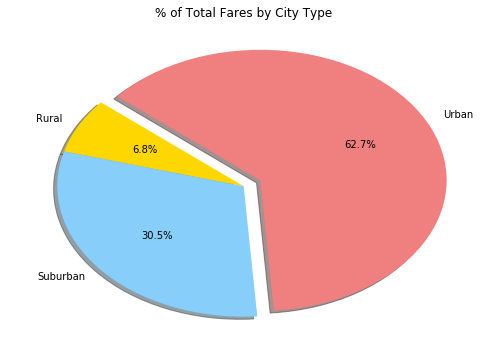

In [6]:
#group by type
by_type = pyber_data_df.groupby('type')['type', 'fare', 'ride_id', 'driver_count']

#total fare by city
fare_sum = by_type.sum()['fare']
#labels build
labels = fare_sum.index
labels
#colors and exploe build
colors = [city_color[n] for n in labels]
explode = [0 , 0, .1]
#figure adjustment
fig, ax = plt.subplots(figsize = (12,6))
# pie chart build
plt.pie(fare_sum, explode=explode, labels=labels, colors=colors,autopct="%1.1f%%", shadow=True, startangle=140)
ax.set_aspect(.7) 
# pie chart title
plt.title('% of Total Fares by City Type',y=1)
plt.savefig("Image of Total Fares By City Types.png")
#pie chart display
plt.show()



#  Total Rides by City Type

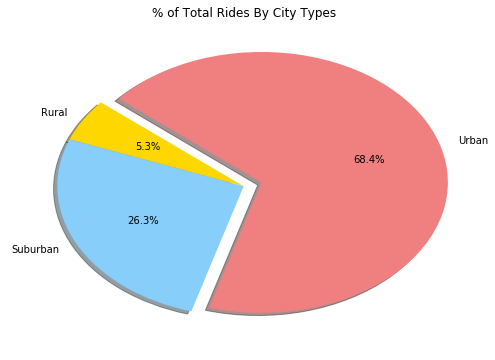

In [7]:
# Calculate Total Rides by City Type
total_rides = pyber_data_df.groupby(['type'])['ride_id'].count()
labels = total_rides.index
#colors and exploe build
colors = [city_color[n] for n in labels]
explode = (0 , 0, .1)
#figure build
fig, ax = plt.subplots(figsize = (12,6))
#pie chart build
plt.pie(total_rides, explode=explode, labels=labels, colors=colors,autopct="%1.1f%%", shadow=True, startangle=140)
ax.set_aspect(.7)
#pie chart title
plt.title("% of Total Rides By City Types")
plt.savefig("Image of Total Rides By City Types.png")
plt.show()



# Total Drivers by City Type

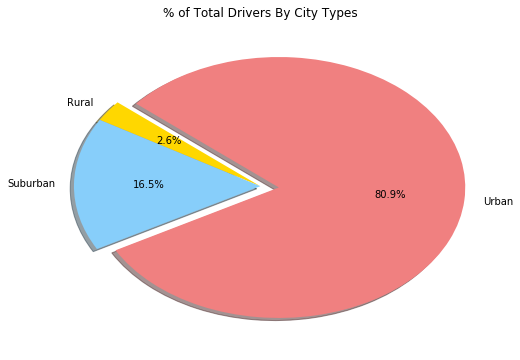

In [8]:
# Calculate Total Drivers by City Type
total_drivers = city_data.groupby(['type'])['driver_count'].sum()
# Labels for the sections of our pie chart
#labels = ["Rural","Suburban","Urban" ]
labels = total_drivers.index
# The colors of each section of the pie chart
#colors = ["gold","lightskyblue","lightcoral"]
colors = [city_color[n] for n in labels]
explode = (0, 0, 0.1)
fig, ax = plt.subplots(figsize = (12,6))
#plt.title("% of Total Drivers By City Types")
plt.pie(total_drivers, explode=explode, labels=labels, colors=colors,autopct="%1.1f%%", shadow=True, startangle=140)
ax.set_aspect(.7)
plt.title("% of Total Drivers By City Types")
plt.savefig("Image of Total Drivers By City Types.png")
plt.show()